# 학생증 학번 및 얼굴 인식 프로젝트

## Open CV 및 Tensorflow 활용

## 라이브러리 선언

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 이미지 불러오기

In [2]:
Original_image = cv2.imread("Student ID Card.jpg", cv2.IMREAD_GRAYSCALE)

## 학생증을 뚜렷하게 만들기 위한 이진화 작업

### 이진화를 하기 위해 흑백으로 변환

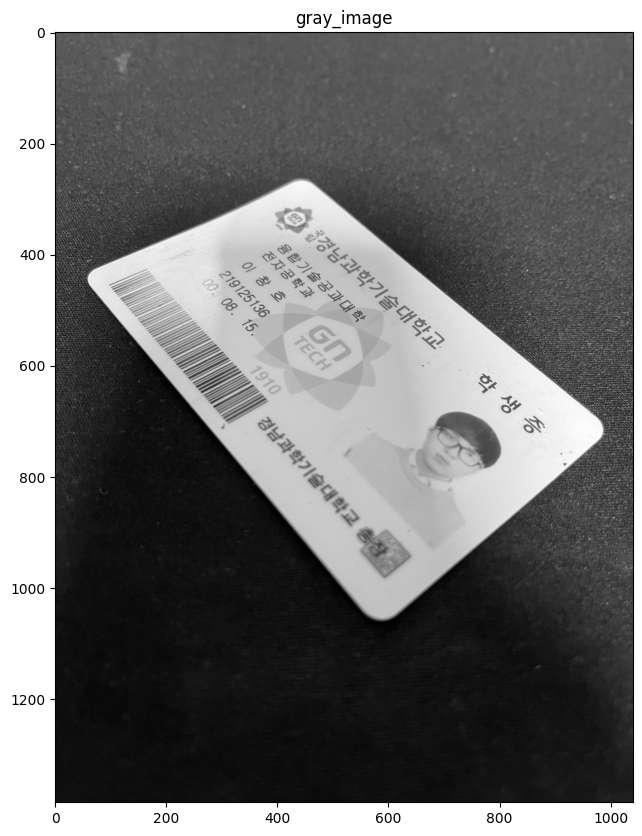

In [3]:
gray_image = cv2.cvtColor(Original_image, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(10,10))
plt.title("gray_image")
plt.imshow(gray_image)

## 이미지 이진화

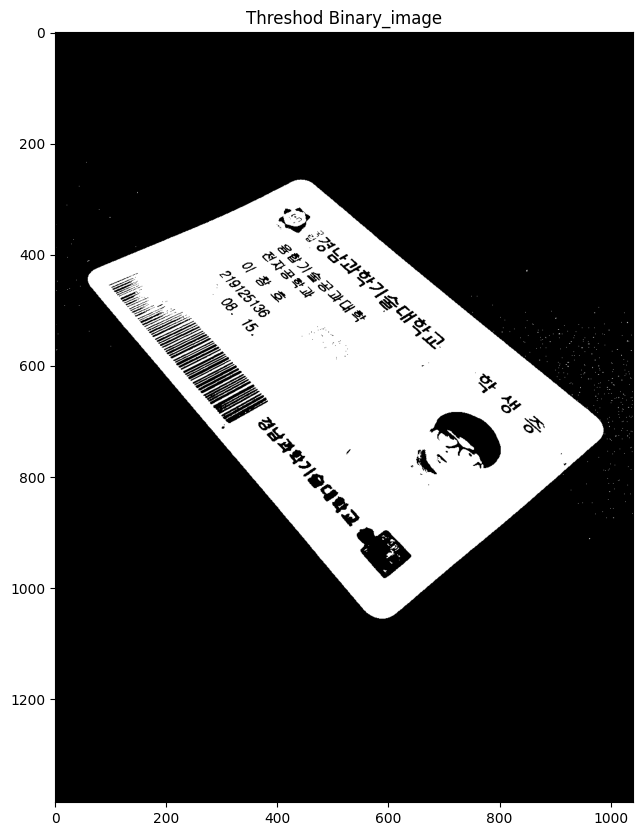

In [13]:
# 127미만의 값 0으로 설정(검은색), 위의 모든 값은 255(흰색)
ret, Binary_image= cv2.threshold(gray_image, 156, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,10))
plt.title("Threshod Binary_image")
plt.imshow(Binary_image)

## Opening - 침식 후 팽창을 통해 학번 선명하게 만듦

너무 두꺼워져서 생략

In [14]:
'''kernel = np.ones((3, 3), dtype=np.uint8)

erode_image = cv2.erode(Binary_image, kernel, iterations=2)
dilate_image = cv2.dilate(erode_image, kernel, iterations=1)

Opening_image = dilate_image

plt.figure(figsize=(15,15))
plt.title("Opening_image")
plt.imshow(Opening_image)'''

'kernel = np.ones((3, 3), dtype=np.uint8)\n\nerode_image = cv2.erode(Binary_image, kernel, iterations=2)\ndilate_image = cv2.dilate(erode_image, kernel, iterations=1)\n\nOpening_image = dilate_image\n\nplt.figure(figsize=(15,15))\nplt.title("Opening_image")\nplt.imshow(Opening_image)'

## Closing - 클로징하면 어떻게 되나 궁금해서 해보는 파트

In [15]:
'''kernel = np.ones((3, 3), dtype=np.uint8)

dilate_image = cv2.dilate(Binary_image, kernel, iterations=3)
erode_image = cv2.erode(dilate_image, kernel, iterations=3)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("dilate_image")
plt.imshow(erode_image)


plt.subplot(2,2,2)
plt.title("Closing_image")
plt.imshow(dilate_image) '''

'kernel = np.ones((3, 3), dtype=np.uint8)\n\ndilate_image = cv2.dilate(Binary_image, kernel, iterations=3)\nerode_image = cv2.erode(dilate_image, kernel, iterations=3)\n\nplt.figure(figsize=(10,10))\n\nplt.subplot(2,2,1)\nplt.title("dilate_image")\nplt.imshow(erode_image)\n\n\nplt.subplot(2,2,2)\nplt.title("Closing_image")\nplt.imshow(dilate_image) '

## 이미지를 잘라내기

### 1. 회전

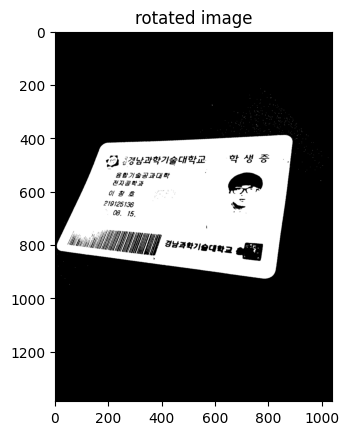

In [16]:
# 회전 
(h, w) = Binary_image.shape[:2]
center = (w / 2, h / 2)
scale = 1.0

angle = 42
M = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(Binary_image, M, (w, h))

plt.title("rotated image")
plt.imshow(rotated_image)

### 2. 그림판에 rotated_image 복붙 후 각 꼭지점 찾아 경계선 나타내기

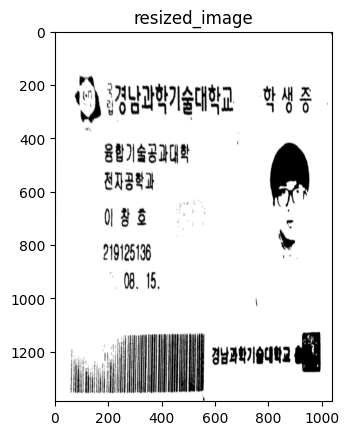

In [17]:
width, height = 1040, 1386

src = np.array([[177, 427], [887, 393], [811, 917], [9, 805]], dtype=np.float32) # Input 4개 지점 (꼭지점 4개의 좌표로 그림판에서 점 찍으면 나옴)
dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32) # Output 4개 지점
# 좌상, 우상, 우하, 좌하 (시계방향으로 4 지점 정의)

matrix = cv2.getPerspectiveTransform(src, dst) #Metrix 얻어 옴
resized_image = cv2.warpPerspective(rotated_image, matrix, (width, height)) # matrix 대로 변환

plt.title("resized_image")
plt.imshow(resized_image)

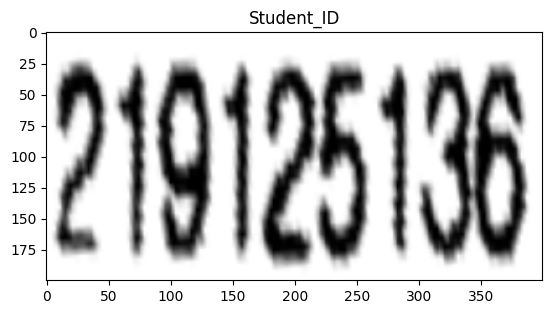

In [18]:
width, height = 400, 200

src = np.array([[177, 786], [365, 786], [365, 867], [177, 867]], dtype=np.float32) # Input 4개 지점 (꼭지점 4개의 좌표로 그림판에서 점 찍으면 나옴)
dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32) # Output 4개 지점
# 좌상, 우상, 우하, 좌하 (시계방향으로 4 지점 정의)

matrix = cv2.getPerspectiveTransform(src, dst) #Metrix 얻어 옴
Student_ID = cv2.warpPerspective(resized_image, matrix, (width, height)) # matrix 대로 변환

plt.title("Student_ID")
plt.imshow(Student_ID)

# 숫자 하나하나 쪼개서 숫자 인식